In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [43]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

In [44]:
# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("그림 저장:", fig_id)
#     if tight_layout:
#         plt.tight_layout()

In [45]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

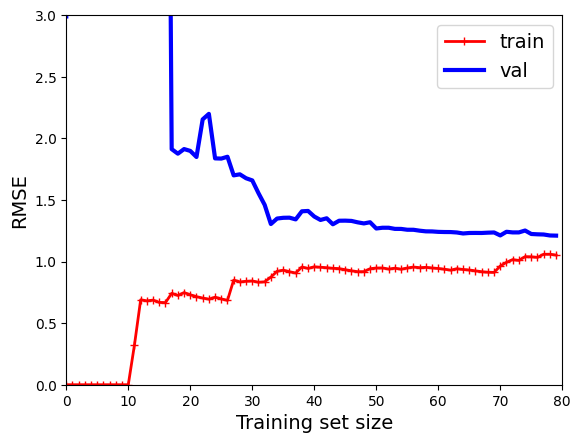

In [51]:
#데이터를 차수(degree)가 10인 다항식으로 변환, 선형회귀모델 적합을 pipeline을 통해 함수처럼 저장함
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])


plot_learning_curves(polynomial_regression, X, y)
#학습곡선을 그리는 함수에 pipeline으로 저장한 과정들을 넣어 동시에 수행함
plt.axis([0, 80, 0, 3])           # 책에는 없음
# save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

training set size=30 이후 부터는 train_set과 valid_set이 비슷한 RMSE를 가짐